# Introducción a las Series de Tiempo

## Configuración inicial

### Cargamos nuestras librerias

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [8]:
from datetime import datetime

### Cargamos y preparamos los datos

In [9]:
df = pd.read_csv('./Data/AirPassengers.csv')

In [10]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

## Trabajando con Series de Tiempo

#### Ajustamos el formato de los datos

In [5]:
df['Month'] = pd.to_datetime(df['Month'])

#### Ajustamos el indice de nuestro dataset

In [6]:
df.set_index('Month', inplace=True)

In [7]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### Convertimos nuestro dataframe en una serie de tiempo

In [11]:
ts = df['#Passengers']

In [12]:
# Consultando por el indice
ts['1949-01-01']

KeyError: '1949-01-01'

In [32]:
# Consultar utilizando la libreria datetime
ts[datetime(1949,1,1)]

112

In [10]:
# Consultar un rango de fechas
ts['1949-01-01':'1949-12-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

In [11]:
# Traer un rango hasta una fecha concreta
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [41]:
# Traer todos los datos de un año
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64


## Estacionariedad

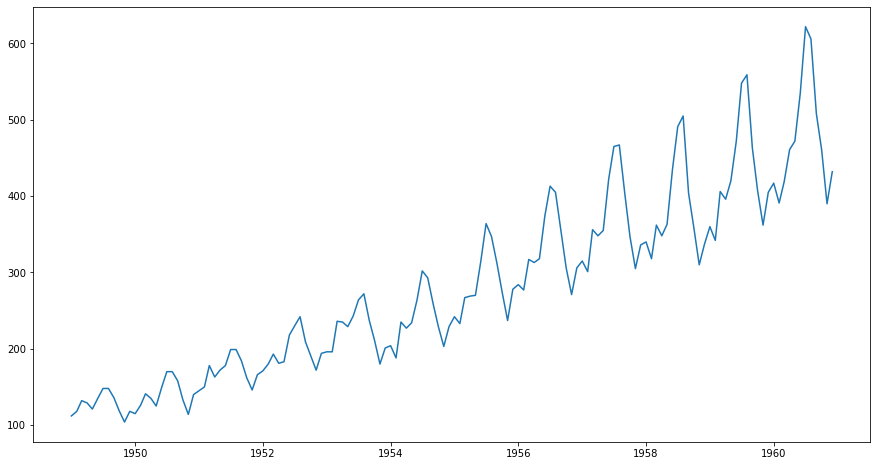

In [12]:
plt.figure(figsize=(15,8))
plt.plot(ts)

### El test de Dickey-Fuller

In [5]:
from statsmodels.tsa.stattools import adfuller

In [14]:
def test_df(timeseries):
    rolmean = pd.rolling_mean(timeseries, window=12)
    print(rolmean)

In [15]:
test_df(ts)

AttributeError: module 'pandas' has no attribute 'rolling_mean'